# Filter out corrupt data

One recurrent step you can expect in the transformation phase would be to clean up some incomplete data. In this exercise, you're going to look at course data, which has the following format:

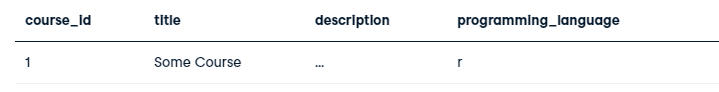

You're going to inspect this DataFrame and make sure there are no missing values by using the pandas DataFrame's .isnull().sum() methods. You will find that the programming_language column has some missing values.

As such, you will complete the transform_fill_programming_language() function by using the .fillna() method to fill missing values.

Instructions

Print the number of missing values in course_data.
Missing values of the programming_language should be the language "R".
Print out the number of missing values per column once more, this time for transformed.

In [ ]:
course_data = extract_course_data(db_engines)

# Print out the number of missing values per column
print(course_data.isnull().sum())

# The transformation should fill in the missing values
def transform_fill_programming_language(course_data):
    imputed = course_data.fillna({"programming_language": "R"})
    return imputed

transformed = transform_fill_programming_language(course_data)

# Print out the number of missing values per column of transformed
print(transformed.isnull().sum())

# Using the recommender transformation

In the last few exercises, you calculated the average rating per course and cleaned up some course data. You will use this data to produce viable recommendations for DataCamp students.

As a reminder, here are the decision rules for producing recommendations:

Use technology a student has rated the most.
Exclude courses a student has already rated.
Find the three top-rated courses from eligible courses.
In order to produce the final recommendations, you will use the average course ratings, and the list of eligible recommendations per user, stored in avg_course_ratings and courses_to_recommend respectively. You will do this by completing the transform_recommendations() function which merges both DataFrames and finds the top 3 highest rated courses to recommend per user.

Instructions

Complete the transform_recommendations() function:
Merge course_to_recommend with avg_course_ratings.
Sort the results by rating, grouping by user ID.
Show the top 3 rows and sort by user ID.
Call the transform_recommendations() function you just defined with the appropriate arguments to store recommendations per user in the recommendations variable.

In [ ]:
# Complete the transformation function
def transform_recommendations(avg_course_ratings, courses_to_recommend):
    # Merge both DataFrames
    merged = courses_to_recommend.merge(avg_course_ratings)
    # Sort values by rating and group by user_id
    grouped = merged.sort_values("rating", ascending=False).groupby("user_id") 
    # Produce the top 3 values and sort by user_id
    recommendations = grouped.head(3).sort_values("user_id").reset_index()
    final_recommendations = recommendations[["user_id", "course_id","rating"]]
    # Return final recommendations
    return final_recommendations

# Use the function with the predefined DataFrame objects
recommendations = transform_recommendations(avg_course_ratings, courses_to_recommend)